<a href="https://colab.research.google.com/github/emiliagyr/EstadisticaExperimental/blob/main/Colab/Examen_2_Soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Indicaciones
1. Recuerda seguir los pasos aprendidos en clase, eso incluye la identificación de variables, planteamiento de hipótesis, verificación de supuestos, contraste y conclusión. Así, el puntaje completo se otorga cuando se han contemplado todos estos pasos.
2. Procura mantener siempre una redacción clara durante las respuestas, pues sólo con ellas se brindará el puntaje correspondiente.
3. Guarda constantemente el archivo en una carpeta segura. Se recomienda usar la siguiente denominación: Examen1_IEE1_ApellidoNombre.
4. Lee las indicaciones con detenimiento, de manera que tengas claro cuál es la hipótesis que se busca comprobar.

In [1]:
!pip install pingouin
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.5 MB/s eta 0:00:00


In [28]:
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy.stats import kstest
import matplotlib.pyplot as plt

#Pregunta 1
De acuerdo con estudios previos sobre la administración pública en países de Latinoamérica (Cortés & Boyer, 2018), se sugiere que ostentar posiciones de poder hace que las personas puedan ser más creativas, dado que dichas posiciones harían que las personas estén más dispuestas a romper con las convenciones para lograr los resultados necesarios. En ese sentido, un grupo de investigadores realizaron tres experimentos para identificar si los cambios en los roles asignados, los cuales representan niveles distintos de poder, tienen un impacto en el desempeño de tareas definidas como creativas.

En el primer experimento, de manera aleatoria, servidores públicos fueron asignados a una de dos situaciones consideradas de poder. Así, un grupo de los participantes asumió el rol de "Funcionario Titular", haciendo referencia a que estos participantes se encontrarían en el rol de liderar instituciones públicas en su país de origen. El otro grupo asumió el rol de "Servidor operador", haciendo referencia a los participantes que tendrían roles de implementar políticas o decisiones tomadas por los participantes del otro grupo.

Luego de asignar a los participantes en los grupos experimentales, se realizó una actividad para que cada participante se presente frente a los demás, ello con la finalidad de reforzar los roles y la jerarquía existente entre estos. Luego, se le pidió a cada participante que desarrolle ideas para luchar contra la corrupción, bajo la consigna de ser ideas creativas, novedosas y únicas. Así, los participantes debían escribir todas las ideas que sean posibles durante 60 minutos, de manera que a mayor cantidad de palabras que cumplían con las condiciones de ser únicas y creativas, se consideraba mayores niveles de creatividad

Durante el experimento, los experimentadores identificaron que posibles variables extrañas afectaron los resultados, como por ejemplo que los participantes se conocieran entre sí, lo cual afectaba las creencias de la jerarquía y roles. Así, los investigadores no estaban seguros de encontrar los mismos los resultados a los hallados en el estudio de Cortés & Boyer (2018). Ante la duda, prefirieron considerar que quienes asumieron el rol de "Funcionario Titular" tendrían niveles distintos de creatividad que aquellos con el rol de "Servidor operador". Para ello, asumieron que los datos siguen una distribución no simétrica.

VD: Valores de autotrascendencia

VI: Mediciones

    N1: Antes
    N2: Sesión
    N3: Final

Diseño: intrasujetos

VI2: Tipo de docente

    N1: Independiente
    N2: Combinada


Diseño: intersujetos

###HT: El tipo de docente asignado al aula genería diferencias en los resultados, tanto de manera independiente, como de manera combinada con el desarrollo del programa.

Variable independiente 1

H0: u1 = U2 = U3 = U4 (las mediciones son iguales)
H1: Al menos 2 son distintos

Variable independiente 2

H0: u1 = U2 = U3 = U4 (las mediciones son iguales)
H1: Al menos 2 son distintos

Interacción

H0: No hay interacción
H1: Si hay interacción

#1. Subir base de datos

In [3]:
df1 = pd.read_spss("Autotrascendencia.sav")
df1

,Caso,Edad,Sexo,Escuela,Docente,Med1,Med2,Med3,Med4,Med5,Ponderacion,Cohesion,Hedonismo,Conformidad
0,1.0,8.0,Masculino,Zona urbana,Multidocente,25.0,46.0,63.0,97.0,66.0,Medio,5.0,25.0,20.0
1,2.0,7.0,Masculino,Zona rural,Unidocente,37.0,50.0,71.0,91.0,65.0,Bajo,4.0,20.0,16.0
2,3.0,6.0,Femenino,Zona rural,Multidocente,34.0,57.0,60.0,99.0,97.0,Bajo,3.0,15.0,12.0
3,4.0,8.0,Masculino,Zona urbana,Unidocente,27.0,53.0,80.0,80.0,69.0,Bajo,6.0,30.0,24.0
4,5.0,8.0,Masculino,Zona rural,Multidocente,12.0,50.0,60.0,84.0,80.0,Alto,7.0,35.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,6.0,Masculino,Zona urbana,Unidocente,25.0,44.0,72.0,89.0,71.0,Bajo,7.0,35.0,28.0
86,87.0,6.0,Masculino,Zona urbana,Unidocente,32.0,48.0,70.0,93.0,80.0,Bajo,7.0,35.0,28.0
87,88.0,8.0,Masculino,Zona rural,Multidocente,19.0,54.0,66.0,87.0,74.0,Bajo,8.0,40.0,32.0
88,89.0,6.0,Masculino,Zona rural,Unidocente,3.0,47.0,79.0,97.0,93.0,Medio,5.0,25.0,20.0


#2. Es necesario crear una columna de las mediciones x intervencion para tener todos los puntajes de sensibilidad juntos

In [7]:
melt_df1 = pd.melt(
    df1, value_name="Valores", var_name="Med", id_vars=["Caso", "Edad", "Sexo", "Escuela", "Docente", "Ponderacion", "Cohesion", "Hedonismo", "Conformidad"]
)
melt_df1

,Caso,Edad,Sexo,Escuela,Docente,Ponderacion,Cohesion,Hedonismo,Conformidad,Med,Valores
0,1.0,8.0,Masculino,Zona urbana,Multidocente,Medio,5.0,25.0,20.0,Med1,25.0
1,2.0,7.0,Masculino,Zona rural,Unidocente,Bajo,4.0,20.0,16.0,Med1,37.0
2,3.0,6.0,Femenino,Zona rural,Multidocente,Bajo,3.0,15.0,12.0,Med1,34.0
3,4.0,8.0,Masculino,Zona urbana,Unidocente,Bajo,6.0,30.0,24.0,Med1,27.0
4,5.0,8.0,Masculino,Zona rural,Multidocente,Alto,7.0,35.0,28.0,Med1,12.0
...,...,...,...,...,...,...,...,...,...,...,...
445,86.0,6.0,Masculino,Zona urbana,Unidocente,Bajo,7.0,35.0,28.0,Med5,71.0
446,87.0,6.0,Masculino,Zona urbana,Unidocente,Bajo,7.0,35.0,28.0,Med5,80.0
447,88.0,8.0,Masculino,Zona rural,Multidocente,Bajo,8.0,40.0,32.0,Med5,74.0
448,89.0,6.0,Masculino,Zona rural,Unidocente,Medio,5.0,25.0,20.0,Med5,93.0


#3. Anova de dos vías

In [8]:
#Asuminedo distribución simétrica
pg.anova(dv="Valores", between=["Med", "Docente"], data=melt_df1)

,Source,SS,DF,MS,F,p-unc,np2
0,Med,285763.235556,4,71440.808889,936.394002,1.174422e-213,8.948771e-01
1,Docente,0.020000,1,0.020000,0.000262,9.870894e-01,5.957847e-07
2,Med * Docente,425.280000,4,106.320000,1.393565,2.352129e-01,1.251028e-02
3,Residual,33569.155556,440,76.293535,NaN,NaN,NaN


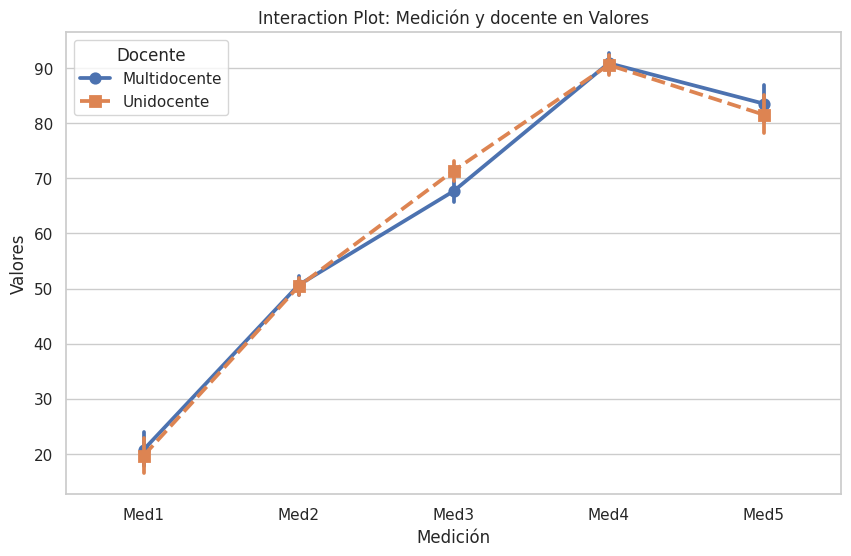

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pointplot(data=melt_df1, x='Med', y='Valores', hue='Docente', markers=['o', 's', 'D'], linestyles=['-', '--', '-.'])
plt.title('Interaction Plot: Medición y docente en Valores')
plt.xlabel('Medición')
plt.ylabel('Valores')
plt.legend(title='Docente')
plt.show()


###CONCLUSIÓN PREGUNTA 1
Hay diferencia entre la medición. Sin embargo, no hay diferencia entre docente ni en la intercción medición-docente (p>0.05).

#Pregunta 2
Desde hace algunos años, varios países presentan retrocesos importantes en la promoción de políticas públicas de salud vinculadas a la salud reproductiva. En ese sentido, diversas organizaciones promueven el acceso libre a información y métodos que tengan un efecto protector frente al aumento en la incidencia en el embarazo adolescente y la presencia de enfermedades de transmisión sexual (ETS) en jóvenes.
Al respecto, la organización no gubernamental, PROMOSEX, con presencia en distintos países de Latinoamérica, viene realizando análisis sobre las estrategias asumidas por los países para promover el uso de métodos de prevención de enfermedades sexuales. En ese sentido, han realizado seguimiento a distintas estrategias de comunicacionales para identificar tendencias en el contenido de los mensajes y su impacto en el uso de estos métodos. Específicamente, se ha identificado cuatro tendencias en la región:
•	Tendencia 1: Uso de mensajes negativos que buscan reforzar emociones negativas hacia las ETS
•	Tendencia 2: Uso de mensajes positivos que buscan reforzar emociones positivas hacia la prevención de enfermedades
•	Tendencia 3: Sin valoración afectiva, se brinda información racional sobre el impacto de las ETS en la salud individual.
•	Tendencia 4: Sin valoración afectiva, se brinda información racional sobre los tipos de métodos anticonceptivos disponibles en el país.
Se seleccionaron participantes de los países que usan estos tipos de mensajes, llegando a obtener información de 60 jóvenes. Asimismo, se aplicaron diversas mediciones sobre el impacto de estas.
Uno de los aspectos que se desea evaluar son las actitudes hacia métodos que previenen la presencia de ETS. Así, se usó una escala psicométrica cuyos puntajes más altos representan una mayor presencia de positivas hacia los métodos en referencia.
La organización sabe que estas actitudes no pueden ser explicadas solo por el efecto de la publicidad estatal, pues asumen que las experiencias personales previas tendrían una repercusión relevante en el desarrollo de conductas de autocuidado. Así, se consideró que los participantes que ya usaban métodos de prevención sexual tendrían niveles distintos de actitudes y, si sumamos el efecto de la publicidad, estas diferencias serían evidentes. Verifica los supuestos requeridos para el análisis, asumiendo

VD: Actitudes hacia ETS

VI: Tendencias

    N1: Emociones negativas hacia contraer ETS
    N2: Emociones positivas hacia prevención ETS
    N3: Consecuencias ETS
    N4: Información sobre tipos de ETS

Diseño: intersujetos

VI2: Uso de métodos de prevención

    N1: Si
    N2: No


Diseño: intersujetos

###HT: Se consideró que los participantes que ya usaban métodos de prevención sexual tendrían niveles distintos de actitudes y, si sumamos el efecto de la publicidad, estas diferencias serían evidentes

In [51]:
df2 = pd.read_spss("Metodo.sav")
df2

,Caso,Mensaje,Sexo,Pareja,Uso_metodo,Consumo_drogas,Actitudes
0,1.0,Emociones positivas hacia prevención ETS,Hombre,No,No,No,65.0
1,2.0,Emociones negativas hacia contraer ETS,Hombre,No,No,Sí,66.0
2,3.0,Emociones positivas hacia prevención ETS,Hombre,Sí,No,No,59.0
3,4.0,Emociones negativas hacia contraer ETS,Hombre,Sí,Sí,No,44.0
4,5.0,Consecuencias ETS,Hombre,No,No,No,75.0
5,6.0,Información sobre tipos de ETS,Hombre,Sí,No,Sí,41.0
6,7.0,Emociones positivas hacia prevención ETS,Hombre,No,No,No,61.0
7,8.0,Consecuencias ETS,Hombre,No,No,Sí,33.0
8,9.0,Información sobre tipos de ETS,Hombre,Sí,No,No,39.0
9,10.0,Emociones negativas hacia contraer ETS,Hombre,No,Sí,Sí,62.0


##ANOVA 2 vías

In [52]:
#Asuminedo distribución simétrica
pg.anova(dv="Actitudes", between=["Mensaje", "Uso_metodo"], data=df2)

,Source,SS,DF,MS,F,p-unc,np2
0,Mensaje,13898.070725,3.0,4632.690242,39.571936,1.852232e-13,0.695400
1,Uso_metodo,566.301371,1.0,566.301371,4.837285,3.232062e-02,0.085108
2,Mensaje * Uso_metodo,311.881764,3.0,103.960588,0.888020,4.535166e-01,0.048735
3,Residual,6087.644841,52.0,117.070093,NaN,NaN,NaN


Hay diferencias significativa en el mensaje y método, mas no en la interrelación.

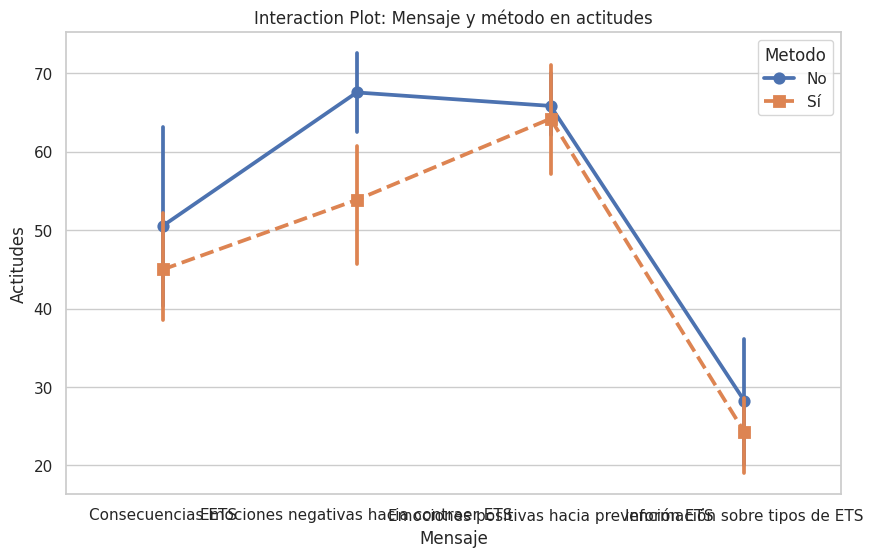

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pointplot(data=df2, x='Mensaje', y='Actitudes', hue="Uso_metodo", markers=['o', 's', 'D', 'X'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: Mensaje y método en actitudes')
plt.xlabel('Mensaje')
plt.ylabel('Actitudes')
plt.legend(title="Metodo")
plt.show()


###Diferencias específicas entre la actitud de participantes que usaban métodos de prevención sexual

###Hacemos una prueba parametrica para comparar k muestras

In [61]:
#Separamos los datos que necesitamos
datos_uso = df2[df2["Uso_metodo"] == "Sí"]

In [63]:
pg.homoscedasticity(data=datos_uso, dv="Actitudes", group="Mensaje")


,W,pval,equal_var
levene,0.386951,0.763276,True


In [64]:
pg.anova(dv="Actitudes", between="Mensaje", data=datos_uso)

,Source,ddof1,ddof2,F,p-unc,np2
0,Mensaje,3,27,21.323046,2.738221e-07,0.703196


In [66]:
pg.pairwise_tukey(data=datos_uso, dv="Actitudes", between="Mensaje")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Consecuencias ETS,Emociones negativas hacia contraer ETS,45.000000,53.875000,-8.875000,5.274094,-1.682754,3.519887e-01,-0.773279
1,Consecuencias ETS,Emociones positivas hacia prevención ETS,45.000000,64.222222,-19.222222,5.135538,-3.742981,4.547264e-03,-1.712048
2,Consecuencias ETS,Información sobre tipos de ETS,45.000000,24.285714,20.714286,5.447060,3.802838,3.906357e-03,2.227569
3,Emociones negativas hacia contraer ETS,Emociones positivas hacia prevención ETS,53.875000,64.222222,-10.347222,4.951701,-2.089630,1.820360e-01,-0.873909
4,Emociones negativas hacia contraer ETS,Información sobre tipos de ETS,53.875000,24.285714,29.589286,5.274094,5.610307,3.368678e-05,2.867334
5,Emociones positivas hacia prevención ETS,Información sobre tipos de ETS,64.222222,24.285714,39.936508,5.135538,7.776500,1.345755e-07,3.938113


###CONCLUSIÓN PREGUNTA 2
Hay diferencias entre:
    Consecuencias ETS y Emociones positivas
    Consecuencias ETS e Información
    Emociones negativas e Información
    Emociones positivas e Informacion

Siendo información el que tiene menos puntajes seguido por consecuencias, emociones negativas y emociones positvas con el mayor puntaje.

#Pregunta 3
De acuerdo con las mediciones más recientes sobre los avances en políticas de desarrollo social, los niveles de pobreza han aumentado en los últimos años. Específicamente, en el año 2023 se han alcanzado resultados que se equiparan a los obtenidos en el año 2020, cuando la pandemia generada por la COVID-19 afectó fuertemente los mismos indicadores. Para revertir las cifras actuales, es necesario enfocar los esfuerzos en generar nuevas estrategias y evaluar los efectos en desarrollo de los niños en edad escolar.
En ese contexto, el Ministerio de Educación, en alianza con el Ministerio de Desarrollo e Inclusión Social, vienen evaluando los efectos pobreza en el desarrollo cognitivo de niños del 1er año de primaria en zonas urbanas pobres. Específicamente, se desea conocer el impacto del acceso a herramientas digitales en el desarrollo cognitivo de un grupo de estudiantes de escuelas ubicadas en zonas geográficas definidas urbanas pobres.
Frente a ello, se deseó evaluar las plataformas virtuales de mayor uso reportadas por los docentes de primaria como son Kahoot, Khan Academy y Academons. Para ello se diseñó un experimento en el que participaron 90 estudiantes de 1° de primaria. El experimento constó de dos etapas: una primera etapa de familiarización en la cual los participantes realizaron un juego diseñado por los investigadores con el objetivo de poder conocer la herramienta; y una segunda etapa, que consistió realizar 10 ejercicios sobre razonamiento verbal. Los niveles de razonamiento verbal fueron medidos mediante el desempeño en los ejercicios planteados, de manera que un mayor número de respuestas correctas, reflejaban un mayor desempeño.
En el programa se valora mucho la información colectada, pero desea tener mayores detalles de un grupo específico de la muestra. Así, se desea poner a prueba que las niñas que participaron del estudio presenten niveles de razonamiento verbal similares, independientemente a la plataforma online que utilizaron. Utilice la base de datos Desarrollo.sav., y asuma que los datos siguen una distribución no normal.

VD: Desempeño de ejercicios RV

VI: Plataforma online

    N1: Kahoot
    N2: Khan Academy
    N3: Academons

Diseño: intersujetos

VI2: Sexo

    N1: Femenino
    N2: Masculino


Diseño: intersujetos

#1. Subir base de datos

In [33]:
df3 = pd.read_spss("Desarrollo.sav")
df3

,ID,Plataforma,Sexo,Uso_previo,Lectura_cuentos,Edad,RV
0,1.0,Khan Academy,Masculino,Sí,No,8.0,5.0
1,2.0,Kahoot,Femenino,No,No,6.0,4.0
2,3.0,Kahoot,Masculino,No,No,6.0,3.0
3,4.0,Kahoot,Femenino,No,No,8.0,6.0
4,5.0,Academons,Femenino,Sí,Sí,6.0,7.0
...,...,...,...,...,...,...,...
85,86.0,Kahoot,Femenino,No,No,7.0,7.0
86,87.0,Kahoot,Masculino,No,Sí,7.0,7.0
87,88.0,Kahoot,Femenino,Sí,No,6.0,8.0
88,89.0,Khan Academy,Masculino,No,Sí,6.0,5.0


###HT: Las niñas que participaron del estudio presenten niveles de razonamiento verbal similares, independientemente a la plataforma online que utilizaron.

###ANOVA no es necesario en la pregunta pero nos da información

In [34]:
#Asuminedo distribución simétrica
pg.anova(dv="RV", between=["Sexo", "Plataforma"], data=df3)

,Source,SS,DF,MS,F,p-unc,np2
0,Sexo,0.124533,1.0,0.124533,0.055681,8.140313e-01,0.000662
1,Plataforma,115.712953,2.0,57.856477,25.868815,1.763271e-09,0.381159
2,Sexo * Plataforma,6.969596,2.0,3.484798,1.558125,2.165534e-01,0.035771
3,Residual,187.868834,84.0,2.236534,NaN,NaN,NaN


No hay diferencias por sexo pero si en plataforma. Por lo tanto las niñas no tienen puntajes similares en las plataformas.

##Hacemos una prueba no parametrica para comparar k muestras

In [35]:
datos_mujeres = df3[df3["Sexo"] == "Femenino"]

# Filtrar datos de mujeres para cada Situacion
rv_situacion1 = datos_mujeres[datos_mujeres["Plataforma"] == "Kahoot"]["RV"]
rv_situacion2 = datos_mujeres[datos_mujeres["Plataforma"] == "Academons"]["RV"]
rv_situacion3 = datos_mujeres[datos_mujeres["Plataforma"] == "Khan Academy"]["RV"]

In [36]:
pg.kruskal(dv="RV", between="Plataforma", data=datos_mujeres)

,Source,ddof1,H,p-unc
Kruskal,Plataforma,2,15.591407,0.000411


###Hacemos comparaciones de 2 muestras para definir en cual es mayor

In [37]:
pg.mwu(rv_situacion1, rv_situacion2)

,U-val,alternative,p-val,RBC,CLES
MWU,78.5,two-sided,0.146969,0.311404,0.344298


In [38]:
pg.mwu(rv_situacion1, rv_situacion3)

,U-val,alternative,p-val,RBC,CLES
MWU,221.5,two-sided,0.005649,-0.554386,0.777193


In [39]:
pg.mwu(rv_situacion3, rv_situacion2)

,U-val,alternative,p-val,RBC,CLES
MWU,15.0,two-sided,0.000158,0.833333,0.083333


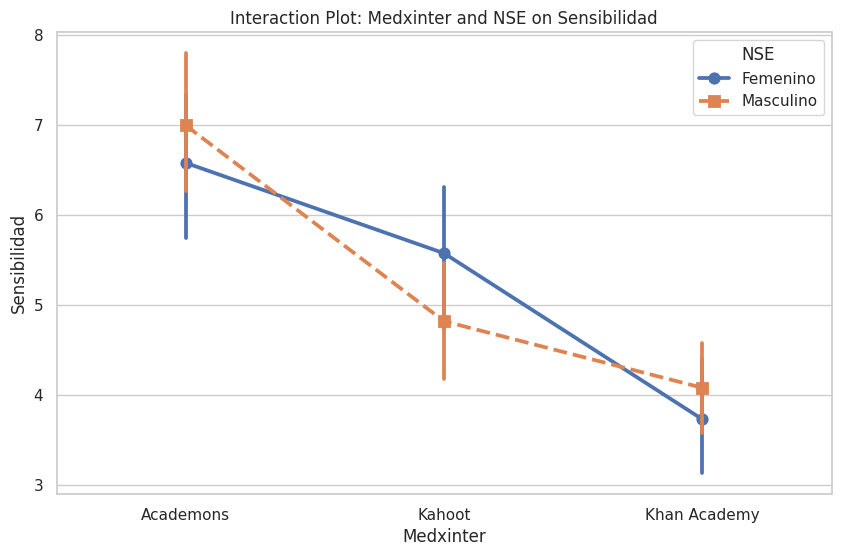

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.pointplot(data=df3, x='Plataforma', y='RV', hue='Sexo', markers=['o', 's', 'D'], linestyles=['-', '--', '-.'])
plt.title('Interaction Plot: Medxinter and NSE on Sensibilidad')
plt.xlabel('Medxinter')
plt.ylabel('Sensibilidad')
plt.legend(title='NSE')
plt.show()


###CONCLUSIÓN PREGUNTA 3
En mujeres no hay diferencia entre Kahoot y Academons pero si entre Kahoot y Khan y Khan y Academons.
Se rechaza la HT.